# China Universities' Global score Scraping

Source: US News  (https://www.usnews.com/education/best-global-universities/search?sort=alpha-asc)

I'm using Python3, and in the local machine.

Guideline:
#### Setup
1. Install selenium, beautifulsoup4: `pip -q install selenium beautifulsoup4`
2. Download Edge webdriver (or any web driver as you want), click download or choose the version here https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/?form=MA13LH
3. Unzip the webdriver anywhere you wish
4. Add the path of the file 'msedgedriver' to your `PATH` environment variables

#### Execute the code
1. Execute all cells
2. When an Edge window appears, just ignore it, check if the `Load more` button is automatedly clicked, if yes, just leave it there for some minutes, otherwise, there's a bug in my code.
3. When the page disappears, the results come.

**Important Notes:**
- It is supposed to have 2165 schools.
- Annotators don't need to run the cells for scraping data. **Please only run the cells in the Labeling section**

See more guidelines on using Python Selenium with Edge Webdriver: https://learn.microsoft.com/en-us/microsoft-edge/webdriver-chromium/?tabs=python

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

# China, Hong Kong and Taiwan schools only
# url = 'https://www.usnews.com/education/best-global-universities/search?country=hong-kong&country=china&country=taiwan'

url = 'https://www.usnews.com/education/best-global-universities/search?sort=alpha-asc'

# Initialize Selenium WebDriver
driver = webdriver.Edge()  # You can replace Chrome with the browser of your choice
driver.get(url)

# Wait for the "Load More" button to appear and click it until all items are loaded
no_clicks = 0
while True:
    try:
        # Wait for the load more button to become clickable
        load_more_button = WebDriverWait(driver, 100).until(EC.element_to_be_clickable((By.CLASS_NAME, "pager__ButtonStyled-sc-1i8e93j-1")))
        if load_more_button is None: break
        # Scroll the element into view
        driver.execute_script("arguments[0].scrollIntoView();", load_more_button)

        # Click the load more button using JavaScript
        driver.execute_script("arguments[0].click();", load_more_button)
        no_clicks += 1

        # Introduce a wait after clicking the button
        time.sleep(2)  # Adjust the sleep time based on your network speed

        print('Clicked', no_clicks)
    except:
        break

# Get the page source after loading all items
page_source = driver.page_source
driver.quit()

# Parse the page source using BeautifulSoup
soup = BeautifulSoup(page_source, 'html.parser')

# Find the list of universities
universities = soup.find_all('li', class_='item-list__ListItemStyled-sc-18yjqdy-1')

# Extract name and global score for each university
results = []
for i, university in enumerate(universities):
    if university.find('aside'): continue
    name = university.find('h2', class_="Heading-sc-1w5xk2o-0").find('a').text
    global_score = university.find('dd', class_='QuickStatHug__Description-hb1bl8-1').text
    results.append({'Name': name, 'Global Score': global_score})

Clicked 1
Clicked 2
Clicked 3
Clicked 4
Clicked 5
Clicked 6
Clicked 7
Clicked 8
Clicked 9
Clicked 10
Clicked 11
Clicked 12
Clicked 13
Clicked 14
Clicked 15
Clicked 16
Clicked 17
Clicked 18
Clicked 19
Clicked 20
Clicked 21
Clicked 22
Clicked 23
Clicked 24
Clicked 25
Clicked 26
Clicked 27
Clicked 28
Clicked 29
Clicked 30
Clicked 31
Clicked 32
Clicked 33
Clicked 34
Clicked 35
Clicked 36
Clicked 37
Clicked 38
Clicked 39
Clicked 40
Clicked 41
Clicked 42
Clicked 43
Clicked 44
Clicked 45
Clicked 46
Clicked 47
Clicked 48
Clicked 49
Clicked 50
Clicked 51
Clicked 52
Clicked 53
Clicked 54
Clicked 55
Clicked 56
Clicked 57
Clicked 58
Clicked 59
Clicked 60
Clicked 61
Clicked 62
Clicked 63
Clicked 64
Clicked 65
Clicked 66


In [ ]:
len(results) # 2165 is enough

2165

In [ ]:
results

[{'Name': 'Harvard University', 'Global Score': '100.0'},
 {'Name': 'Massachusetts Institute of Technology (MIT)',
  'Global Score': '97.7'},
 {'Name': 'Stanford University', 'Global Score': '95.2'},
 {'Name': 'University of California Berkeley', 'Global Score': '88.7'},
 {'Name': 'University of Oxford', 'Global Score': '86.8'},
 {'Name': 'University of Washington Seattle', 'Global Score': '86.6'},
 {'Name': 'Columbia University', 'Global Score': '86.5'},
 {'Name': 'University of Cambridge', 'Global Score': '86.1'},
 {'Name': 'California Institute of Technology', 'Global Score': '85.6'},
 {'Name': 'Johns Hopkins University', 'Global Score': '84.7'},
 {'Name': 'Yale University', 'Global Score': '84.6'},
 {'Name': 'University College London', 'Global Score': '84.4'},
 {'Name': 'Imperial College London', 'Global Score': '84.3'},
 {'Name': 'University of California Los Angeles', 'Global Score': '84.2'},
 {'Name': 'University of Pennsylvania', 'Global Score': '84.0'},
 {'Name': 'Princeton U

In [ ]:
# export results to CSV

import csv

keys = results[0].keys()

# with open('USNews_China_Taiwan_HongKong_School_Scores.csv', 'w', newline='') as output_file:
with open('USNews_Global_School_Scores.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(results)

In [ ]:
# Double-check
!cat 'USNews_Global_School_Scores.csv'

Name,Global Score
Harvard University,100.0
Massachusetts Institute of Technology (MIT),97.7
Stanford University,95.2
University of California Berkeley,88.7
University of Oxford,86.8
University of Washington Seattle,86.6
Columbia University,86.5
University of Cambridge,86.1
California Institute of Technology,85.6
Johns Hopkins University,84.7
Yale University,84.6
University College London,84.4
Imperial College London,84.3
University of California Los Angeles,84.2
University of Pennsylvania,84.0
Princeton University,83.9
University of California San Francisco,83.9
University of Toronto,83.8
University of Michigan,83.4
University of California San Diego,83.3
Cornell University,82.9
University of Chicago,82.5
Tsinghua University,81.3
Northwestern University,81.2
Duke University,80.7
National University of Singapore,80.4
University of Melbourne,80.3
University of Sydney,79.9
ETH Zurich,79.3
Nanyang Technological University,79.0
New York University,78.5
Washington University (WUSTL),78.1
Kin

# Labeling

Tính nhất quán:
- Dữ liệu từ MOOCCubeX và USNews chưa được nhất quán về cách đặt tên, ta sẽ tiến hành nhất quán hóa dữ liệu từ 2 nguồn với nhau

- Phương pháp thực hiện:
+ Automated kết hợp kiểm tra chéo bằng con người

- Sau cùng, nếu trường không được xếp hạng, hãy gán nhãn cho nó là unranked

**Note:** Hãy install các modules sau: `fuzzywuzzy`, `ipywidgets`

In [ ]:
!pip -q install fuzzywuzzy ipywidgets
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ARFyM1daJ5WwClNRE_eQpMmalf0RXhmj' -O 'USNews_Global_School_Scores.csv'

In [ ]:
ENDPOINT = "https://lfs.aminer.cn/misc/moocdata/data/mooccube2/"
files = "entities/reply.json entities/video.json entities/comment.json entities/course.json entities/other.json entities/paper.json entities/problem.json entities/school.json entities/teacher.json entities/user.json entities/concept.json relations/course-school.txt relations/course-teacher.txt relations/user-comment.txt relations/video_id-ccid.txt relations/comment-reply.txt relations/concept-other.txt relations/course-comment.txt relations/concept-video.txt relations/exercise-problem.txt relations/user-reply.txt relations/concept-comment.txt relations/concept-paper.txt relations/concept-problem.txt relations/concept-reply.json relations/course-field.json relations/reply-reply.txt relations/user-problem.json relations/user-video.json relations/user-xiaomu.json prerequisites/psy.json prerequisites/cs.json prerequisites/math.json".split(' ')
FILES = dict()
for f in files:
    FILES[f.split('/')[1].split('.')[0]] = ENDPOINT + f
del files

In [ ]:
import pandas as pd

schools = pd.read_json(FILES['school'], lines=True)
schools

,id,name,name_en,sign,about,motto
0,S_1,清华大学,Tsinghua University,thu,简称“清华”，由中华人民共和国教育部直属，中央直管副部级建制，位列“211工程”、“985工...,"自强不息,厚德载物"
1,S_2,北京大学,Peking University,PKU,北京大学（Peking University），简称“北大”，是中华人民共和国教育部直属的全...,博学、审问、慎思、明辨
2,S_3,武汉大学,Wuhan University,whu,武汉大学（Wuhan University）简称“武大”，是中华人民共和国教育部直属的综合性...,自强 弘毅 求是 拓新
3,S_4,苏州大学,Soochow University,suda,苏州大学（Soochow University），坐落于历史文化名城苏州，是教育部与江苏省人...,养天地正气，法古今完人
4,S_5,四川大学,Sichuan University,scu,四川大学（Sichuan University），简称“川大”，坐落于四川省会成都，是教育部...,
...,...,...,...,...,...,...
424,S_1402,高雄医学大学,Kaohsiung Medical University,Kaohsiung Medical University,高雄医学大学（Kaohsiung Medical University）源自1954年创校的...,
425,S_1405,黑龙江农垦职业学院,Heilongjiang Agricultural ReclamationVocationa...,nkzy,黑龙江农垦职业学院（Heilongjiang Agricultural Reclamatio...,
426,S_1448,江西财经大学,Jiangxi University of Finance And Economics,jxufe,江西财经大学（Jiangxi University of Finance and Econo...,
427,S_1453,贵州交通职业技术学院,GuiZhou Communications Polytechnic,gzjtzy,贵州交通职业技术学院是一所以交通为特色的理工类高职院校。创办于1958年，走过国家“示范校”...,知行合一 德技双馨


In [ ]:
global_ranks = pd.read_csv('USNews_Global_School_Scores.csv')
global_ranks

,Name,Global Score
0,Harvard University,100.0
1,Massachusetts Institute of Technology (MIT),97.7
2,Stanford University,95.2
3,University of California Berkeley,88.7
4,University of Oxford,86.8
...,...,...
2160,Xi'an Polytechnic University,NaN
2161,Zahedan University of Medical Sciences,NaN
2162,Zewail City of Science & Technology,NaN
2163,Zhejiang University of Finance & Economics,NaN


In [ ]:
labeled_schools = pd.merge(schools, global_ranks, how='inner', left_on='name_en', right_on='Name')

outer_full = pd.merge(global_ranks, schools, how='right', left_on='Name', right_on='name_en')
unlabeled_schools = outer_full[outer_full['Global Score'].isna()].reset_index()

In [ ]:
unlabeled_schools

,index,Name,Global Score,id,name,name_en,sign,about,motto
0,3,NaN,NaN,S_4,苏州大学,Soochow University,suda,苏州大学（Soochow University），坐落于历史文化名城苏州，是教育部与江苏省人...,养天地正气，法古今完人
1,7,NaN,NaN,S_8,台湾交通大学,National Chiao Tung University,nctu,台湾交通大学（National Chiao Tung University，缩写为NCTU）...,
2,9,NaN,NaN,S_10,国际关系学院,University of International Relations,uir,国际关系学院（University of International Relations），...,忠诚 勤奋 求实 创新
3,13,NaN,NaN,S_14,东南大学,Southeast University,seu,东南大学坐落于六朝古都南京，是享誉海内外的著名高等学府。学校是国家教育部直属并与江苏省共建的...,止于至善
4,15,NaN,NaN,S_16,昆士兰大学,The University of Queensland,uqx,昆士兰大学（The University of Queensland），简称昆大，世界著名顶...,
...,...,...,...,...,...,...,...,...,...
280,423,NaN,NaN,S_1392,北京迪生数字娱乐科技股份有限公司,"Beijing Dison Digital Entertainment Co., Ltd.",BJDS,北京迪生数字娱乐科技股份有限公司于2008年10月14日在海淀分局登记成立。法定代表人李中秋...,
281,425,NaN,NaN,S_1405,黑龙江农垦职业学院,Heilongjiang Agricultural ReclamationVocationa...,nkzy,黑龙江农垦职业学院（Heilongjiang Agricultural Reclamatio...,
282,426,NaN,NaN,S_1448,江西财经大学,Jiangxi University of Finance And Economics,jxufe,江西财经大学（Jiangxi University of Finance and Econo...,
283,427,NaN,NaN,S_1453,贵州交通职业技术学院,GuiZhou Communications Polytechnic,gzjtzy,贵州交通职业技术学院是一所以交通为特色的理工类高职院校。创办于1958年，走过国家“示范校”...,知行合一 德技双馨


In [ ]:
labeled_schools

,id,name,name_en,sign,about,motto,Name,Global Score
0,S_1,清华大学,Tsinghua University,thu,简称“清华”，由中华人民共和国教育部直属，中央直管副部级建制，位列“211工程”、“985工...,"自强不息,厚德载物",Tsinghua University,81.3
1,S_2,北京大学,Peking University,PKU,北京大学（Peking University），简称“北大”，是中华人民共和国教育部直属的全...,博学、审问、慎思、明辨,Peking University,76.8
2,S_3,武汉大学,Wuhan University,whu,武汉大学（Wuhan University）简称“武大”，是中华人民共和国教育部直属的综合性...,自强 弘毅 求是 拓新,Wuhan University,66.2
3,S_5,四川大学,Sichuan University,scu,四川大学（Sichuan University），简称“川大”，坐落于四川省会成都，是教育部...,,Sichuan University,58.1
4,S_6,北京理工大学,Beijing Institute of Technology,bit,北京理工大学（Beijing Institute of Technology）是中国共产党创...,,Beijing Institute of Technology,58.4
...,...,...,...,...,...,...,...,...
141,S_1082,广东药科大学,Guangdong Pharmaceutical University,gdpu,广东药科大学（Guangdong Pharmaceutical University），简称...,,Guangdong Pharmaceutical University,20.4
142,S_1084,山东中医药大学,Shandong University of Traditional Chinese Med...,sdutcm,山东中医药大学位于山东省济南市，是全国重点建设的中医院校、山东省重点高校、山东省人民政府和国...,,Shandong University of Traditional Chinese Med...,13.3
143,S_1199,徐州医科大学,Xuzhou Medical University,xzhmu,徐州医科大学（Xuzhou Medical University），简称“徐医大”，坐落在中...,,Xuzhou Medical University,23.1
144,S_1270,东国大学,Dongguk University,DGU,"东国大学（동국대학교，Dongguk University）简称东大或DGU，取""东方之国""...",,Dongguk University,37.7


In [ ]:
from fuzzywuzzy import process, fuzz
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Function to perform fuzzy search
def fuzzy_search(query, choices, confidence_threshold=90, limit=3):
    results = process.extract(query, choices, limit=limit)
    filtered_results = [result for result in results if result[1] > confidence_threshold]

    if len(filtered_results) > 1: return filtered_results
    elif len(filtered_results) == 0: return ''

    return [filtered_results[0][0]]

In [ ]:
import ipywidgets as widgets
from IPython.display import display

index = unlabeled_schools.index[0]
row = None
text_box = None
new_name = None
ok_button = None



def on_ok_button_click(b):
    global index
    global labeled_schools
    global unlabeled_schools
    global new_name
    global text_box

    if not text_box is None:
        new_name = new_name[int(text_box.value)][0]
    else:
        new_name = new_name[0]
    row['Global Score'] = global_ranks[global_ranks['Name'] == new_name]['Global Score'].item()
    row['Name'] = new_name
    labeled_schools = pd.concat([labeled_schools, pd.DataFrame(row).transpose()], axis=0)
    print(index)
    unlabeled_schools = unlabeled_schools.drop(index)
    print(f"Changed: Old name: {row['name_en']}\t===>\tNew name: {new_name}\n")
    index += 1
    display_next()


def on_cancel_button_click(b):
    global index
    global text_box
    print("Operation cancelled")
    index += 1
    display_next()


def display_next():
    global index
    global row
    global new_name
    global ok_button

    print(index)

    if index < len(unlabeled_schools):

        row = unlabeled_schools.loc[index]
        print(row['name_en'])
        new_name = fuzzy_search(row['name_en'], global_ranks['Name'])

        if len(new_name) == 1:
            print('Confirm this new name? \n')
            print(f"Old name: {row['name_en']}\n===>New name: {new_name}\n")
            # Create an "OK" button
            ok_button = widgets.Button(description='OK')
            cancel_button = widgets.Button(description='Cancel')

            ok_button.on_click(on_ok_button_click)
            cancel_button.on_click(on_cancel_button_click)

            display(widgets.HBox([ok_button, cancel_button]))

        else:
            if len(new_name) > 0:
                global text_box
                print(new_name)
                text_box = widgets.Text(placeholder='Enter the selected index (0-2):')

                # Create an "OK" button
                ok_button = widgets.Button(description='OK')
                cancel_button = widgets.Button(description='Cancel')

                ok_button.on_click(on_ok_button_click)
                cancel_button.on_click(on_cancel_button_click)

                display(text_box)
                display(widgets.HBox([ok_button, cancel_button]))

        if len(new_name) == 0:
            index += 1
            print('Not found \n')
            display_next()
    else:
        print("No more items to label.")

display_next()

no_ranked_schools = labeled_schools[0:0].copy(deep=False)

0
Soochow University
Confirm this new name? 

Old name: Soochow University
===>New name: ['Soochow University - China']



C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Global Score'] = global_ranks[global_ranks['Name'] == new_name]['Global Score'].item()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Name'] = new_name


0
Changed: Old name: Soochow University	===>	New name: Soochow University - China

1
National Chiao Tung University
Confirm this new name? 

Old name: National Chiao Tung University
===>New name: ['National Yang Ming Chiao Tung University']



C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Global Score'] = global_ranks[global_ranks['Name'] == new_name]['Global Score'].item()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Name'] = new_name


1
Changed: Old name: National Chiao Tung University	===>	New name: National Yang Ming Chiao Tung University

2
University of International Relations
Not found 

3
Southeast University
Confirm this new name? 

Old name: Southeast University
===>New name: ['Southeast University - China']



C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Global Score'] = global_ranks[global_ranks['Name'] == new_name]['Global Score'].item()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Name'] = new_name


3
Changed: Old name: Southeast University	===>	New name: Southeast University - China

4
The University of Queensland
Confirm this new name? 

Old name: The University of Queensland
===>New name: ['University of Queensland']



C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Global Score'] = global_ranks[global_ranks['Name'] == new_name]['Global Score'].item()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Name'] = new_name


4
Changed: Old name: The University of Queensland	===>	New name: University of Queensland

5
Liaoning University of International Business
Not found 

6
Zhejiang Fashion Institute of Technology
Not found 

7
Ningbo City College of  Vocational Technology
Not found 

8
Shenzhen Institute & Information Technology
Not found 

9
China Institute of Entrepreneurship
Not found 

10
Zhejiang Financial College
Not found 

11
Tianjin Foreign Studies University
Not found 

12
Kunming University of Science and Technology
Confirm this new name? 

Old name: Kunming University of Science and Technology
===>New name: ['Kunming University of Science & Technology']



C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Global Score'] = global_ranks[global_ranks['Name'] == new_name]['Global Score'].item()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Name'] = new_name


12
Changed: Old name: Kunming University of Science and Technology	===>	New name: Kunming University of Science & Technology

13
Honghe University
Not found 

14
Southwestern University of Finance and Economics
Confirm this new name? 

Old name: Southwestern University of Finance and Economics
===>New name: ['Southwestern University of Finance & Economics - China']



C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Global Score'] = global_ranks[global_ranks['Name'] == new_name]['Global Score'].item()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1600\3270038768.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Name'] = new_name


14
Changed: Old name: Southwestern University of Finance and Economics	===>	New name: Southwestern University of Finance & Economics - China

15
Shaanxi Polytechnic Institute
Not found 

16
Beijing Language and Culture University
Not found 

17
Wuhan University of Science and Technology
[('Wuhan University of Technology', 95, 343), ('Wuhan University of Science & Technology', 95, 964)]


Text(value='', placeholder='Enter the selected index (0-2):')

In [ ]:
labeled_schools.tail(10)

,id,name,name_en,sign,about,motto,Name,Global Score,index
142,S_1084,山东中医药大学,Shandong University of Traditional Chinese Med...,sdutcm,山东中医药大学位于山东省济南市，是全国重点建设的中医院校、山东省重点高校、山东省人民政府和国...,,Shandong University of Traditional Chinese Med...,13.3,NaN
143,S_1199,徐州医科大学,Xuzhou Medical University,xzhmu,徐州医科大学（Xuzhou Medical University），简称“徐医大”，坐落在中...,,Xuzhou Medical University,23.1,NaN
144,S_1270,东国大学,Dongguk University,DGU,"东国大学（동국대학교，Dongguk University）简称东大或DGU，取""东方之国""...",,Dongguk University,37.7,NaN
145,S_1402,高雄医学大学,Kaohsiung Medical University,Kaohsiung Medical University,高雄医学大学（Kaohsiung Medical University）源自1954年创校的...,,Kaohsiung Medical University,34.2,NaN
0,S_4,苏州大学,Soochow University,suda,苏州大学（Soochow University），坐落于历史文化名城苏州，是教育部与江苏省人...,养天地正气，法古今完人,Soochow University - China,57.9,3
1,S_8,台湾交通大学,National Chiao Tung University,nctu,台湾交通大学（National Chiao Tung University，缩写为NCTU）...,,National Yang Ming Chiao Tung University,48.8,7
3,S_14,东南大学,Southeast University,seu,东南大学坐落于六朝古都南京，是享誉海内外的著名高等学府。学校是国家教育部直属并与江苏省共建的...,止于至善,Southeast University - China,61.3,13
4,S_16,昆士兰大学,The University of Queensland,uqx,昆士兰大学（The University of Queensland），简称昆大，世界著名顶...,,University of Queensland,77.2,15
12,S_36,昆明理工大学,Kunming University of Science and Technology,kmust,昆明理工大学是综合性省属重点大学，是国家国防科技工业局与云南省人民政府共建高校，国家“中西部...,,Kunming University of Science & Technology,34.7,32
14,S_47,西南财经大学,Southwestern University of Finance and Economics,swufe,西南财经大学，位于四川省成都市，是中华人民共和国教育部直属高校，国家“世界一流学科建设高校”...,,Southwestern University of Finance & Economics...,45.3,38


In [ ]:
unlabeled_schools.head(15)

,index,Name,Global Score,id,name,name_en,sign,about,motto
2,9,NaN,NaN,S_10,国际关系学院,University of International Relations,uir,国际关系学院（University of International Relations），...,忠诚 勤奋 求实 创新
5,17,NaN,NaN,S_18,辽宁对外经贸学院,Liaoning University of International Business,luibe,辽宁对外经贸学院位于辽宁省大连市，是2005年经国家教育部批准设立的本科层次全日制民办普通高...,求真 明德 至善 超越
6,20,NaN,NaN,S_21,浙江纺织服装职业技术学院,Zhejiang Fashion Institute of Technology,zjff,浙江纺织服装职业技术学院（Zhejiang Fashion Institute of Tec...,修德、长技、求真、尚美
7,21,NaN,NaN,S_22,宁波城市职业技术学院,Ningbo City College of Vocational Technology,nbcc,宁波城市职业技术学院于2003年3月经浙江省人民政府批准设置而成。学校的前身——宁波大学职业...,
8,22,NaN,NaN,S_23,深圳信息职业技术学院,Shenzhen Institute & Information Technology,sziit,深圳信息职业技术学院（Shenzhen Institute & Information Te...,
9,24,NaN,NaN,S_28,中国创业学院,China Institute of Entrepreneurship,cie,学堂在线“中国创业学院”频道是由清华大学和学堂在线共同发起的创业教育平台，通过线上与线下、课...,
10,25,NaN,NaN,S_29,浙江金融职业学院,Zhejiang Financial College,zfc,浙江金融职业学院位于浙江省杭州市，是一所由浙江省人民政府举办的公办全日制普通高等职业学校，为...,
11,30,NaN,NaN,S_34,天津外国语大学,Tianjin Foreign Studies University,tjfsu,天津外国语大学（Tianjin Foreign Studies University，TFS...,
13,36,NaN,NaN,S_40,红河学院,Honghe University,uoh,红河学院位于红河哈尼族彝族自治州州府蒙自市，是一所云南省省属公办综合性普通本科院校，学校实行...,
15,40,NaN,NaN,S_49,陕西工业职业技术学院,Shaanxi Polytechnic Institute,SXPI,陕西工业职业技术学院（Shaanxi Polytechnic Institute）简称“陕西...,


# Thực hiện thống kê và phân cụm

Các công việc cần làm:
- Thống kê global scores của các trường có trong dataset, visualize sơ đồ phân phối điểm
- Thực hiện chia top các trường (ví dụ như top 5% điểm cao nhất là trường hạng 1, 5-15% tiếp theo là hạng 2...)
- Các trường không có điểm xếp hạng sẽ được gán nhãn unranked
- Sau khi làm xong, hãy tổng hợp lại thành bộ dataset, xóa những cột, hàng lặp lại... (Tóm lại là làm sạch dữ liệu).

*Một số công việc không bắt buộc*:
- Dịch từ tiếng Trung sang tiếng Anh các cột `motto`, `about`. (sử dụng API google translate)

Output:
- Một bộ dataset có format JSONLines như dataset gốc
- Bao gồm khoảng 430 mẫu dữ liệu. Nếu số mẫu ít hơn thì hãy giải thích lý do bỏ đi các mẫu đó

In [1]:
#import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from deep_translator import GoogleTranslator

In [45]:
#Đọc file chứa dữ liệu trường học ở Trung Quốc
schools = pd.read_json('school_rank_no_describe.json', lines=True)

In [46]:
schools.head()

,id,name_en,score,rank
0,S_1,Tsinghua University,81.3,1.0
1,S_2,Peking University,76.8,1.0
2,S_267,McGill University,74.6,1.0
3,S_269,Shanghai Jiao Tong University,71.3,1.0
4,S_138,Zhejiang University,70.7,1.0


In [4]:
#Xoá cột name và sign
schools = schools.drop(columns=['name', 'sign'])

In [6]:
#Tạo thêm cột: score và rank
#score được lấy từ file USNews_Global_School_Scores.csv
schools['score'] = np.nan

In [7]:
schools['rank'] = np.nan

In [47]:
schools.head(10)

,id,name_en,score,rank
0,S_1,Tsinghua University,81.3,1.0
1,S_2,Peking University,76.8,1.0
2,S_267,McGill University,74.6,1.0
3,S_269,Shanghai Jiao Tong University,71.3,1.0
4,S_138,Zhejiang University,70.7,1.0
5,S_24,Fudan University,68.8,1.0
6,S_142,City University of Hong Kong,68.5,1.0
7,S_65,Nanjing University,68.2,1.0
8,S_3,Wuhan University,66.2,1.0
9,S_64,Hunan University,65.3,1.0


In [9]:
score = pd.read_csv('USNews_Global_School_Scores.csv')

In [10]:
score

,Name,Global Score
0,Harvard University,100.0
1,Massachusetts Institute of Technology (MIT),97.7
2,Stanford University,95.2
3,University of California Berkeley,88.7
4,University of Oxford,86.8
...,...,...
2160,Xi'an Polytechnic University,NaN
2161,Zahedan University of Medical Sciences,NaN
2162,Zewail City of Science & Technology,NaN
2163,Zhejiang University of Finance & Economics,NaN


In [11]:
#Kết hợp dữ liệu từ file score vào dữ liệu trường học
for i in range(len(schools)):
    for j in range(len(score)):
        if schools['name_en'][i] == score['Name'][j]:
            schools['score'][i] = score['Global Score'][j]
            break

In [48]:
#Xếp lại các trường học theo thứ tự giảm dần của score
schools = schools.sort_values(by='score', ascending=False)

In [49]:
schools.head(50)

,id,name_en,score,rank
165,S_57,Massachusetts Institute of Technology,97.7,NaN
174,S_75,"University of California, Berkeley",88.7,NaN
0,S_1,Tsinghua University,81.3,1.0
148,S_16,The University of Queensland,77.2,NaN
1,S_2,Peking University,76.8,1.0
286,S_302,The Chinese University of Hong Kong,74.7,NaN
2,S_267,McGill University,74.6,1.0
179,S_85,The University of Adelaide,72.8,NaN
3,S_269,Shanghai Jiao Tong University,71.3,1.0
296,S_328,Wageningen University,71.3,NaN


In [50]:
#xếp lại index
schools = schools.reset_index(drop=True)

In [51]:
#Đánh rank cho các trường học
#rank = 1 cho 5% trường học có score cao nhất
#rank = 2 cho 5% - 15% trường học có score cao nhất
#rank = 3 cho 15% - 30% trường học có score cao nhất
#rank = 4 cho 30% - 50% trường học có score cao nhất
#rank = 5 cho các trường học còn lại
#trường không có score sẽ là unranked

for i in range(len(schools)):
    if i < 0.05 * len(schools):
        schools['rank'][i] = 1
    elif i < 0.15 * len(schools):
        schools['rank'][i] = 2
    elif i < 0.3 * len(schools):
        schools['rank'][i] = 3
    elif i < 0.5 * len(schools):
        schools['rank'][i] = 4
    else:
        schools['rank'][i] = 5

In [52]:
#nếu trường học không có score thì rank = nan
for i in range(len(schools)):
    if np.isnan(schools['score'][i]):
        schools['rank'][i] = np.nan

In [58]:
schools

,id,name_en,score,rank
0,S_57,Massachusetts Institute of Technology,97.7,1.0
1,S_75,"University of California, Berkeley",88.7,1.0
2,S_1,Tsinghua University,81.3,1.0
3,S_16,The University of Queensland,77.2,1.0
4,S_2,Peking University,76.8,1.0
...,...,...,...,...
424,S_1392,"Beijing Dison Digital Entertainment Co., Ltd.",NaN,NaN
425,S_1405,Heilongjiang Agricultural ReclamationVocationa...,NaN,NaN
426,S_1448,Jiangxi University of Finance And Economics,NaN,NaN
427,S_1453,GuiZhou Communications Polytechnic,NaN,NaN


In [55]:
# Kiểm tra dữ liệu có trùng lặp không
# schools.duplicated().sum()
#Kiểm tra dữ liệu có giá trị thiếu không
schools.isnull().sum()

id           0
name_en      0
score      217
rank       217
dtype: int64

In [57]:
#xuất dữ liệu ra file json
schools.to_json('school_rank.json', orient='records', lines=True, force_ascii=False)

In [56]:
schools

,id,name_en,score,rank
0,S_57,Massachusetts Institute of Technology,97.7,1.0
1,S_75,"University of California, Berkeley",88.7,1.0
2,S_1,Tsinghua University,81.3,1.0
3,S_16,The University of Queensland,77.2,1.0
4,S_2,Peking University,76.8,1.0
...,...,...,...,...
424,S_1392,"Beijing Dison Digital Entertainment Co., Ltd.",NaN,NaN
425,S_1405,Heilongjiang Agricultural ReclamationVocationa...,NaN,NaN
426,S_1448,Jiangxi University of Finance And Economics,NaN,NaN
427,S_1453,GuiZhou Communications Polytechnic,NaN,NaN


In [20]:
translator = GoogleTranslator(source='auto', target='english')

In [25]:
print(translator.translate("简称“清华”，由中华人民共和国教育部直属，中央直管副部级建制，位列“211工程”、“985工程”、“世界一流大学和一流学科”，入选“基础学科拔尖学生培养试验计划”、“高等学校创新能力提升计划”、“高等学校学科创新引智计划”，为九校联盟、松联盟、中国大学校长联谊会、亚洲大学联盟、环太平洋大学联盟、清华—剑桥—MIT低碳大学联盟成员，被誉为“红色工程师的摇篮"))

"Tsinghua" for short, is directly under the Ministry of Education of the People's Republic of China and directly managed by the central government at the deputy ministerial level. It ranks among the "211 Project", "985 Project", "World-class University and First-class Discipline", and was selected into the "Top-notch Student Training Experiment in Basic Disciplines" Plan", "Innovation Capacity Improvement Plan for Colleges and Universities", and "Discipline Innovation and Talent Introduction Plan for Colleges and Universities", for the Nine University Alliance, Pine Alliance, Chinese University Presidents Association, Asian University Alliance, Pacific Rim University Alliance, Tsinghua-Cambridge-MIT A member of the Low Carbon University Alliance, known as the "cradle of red engineers"


In [41]:
schools.head(31)

,id,name_en,about,motto,score,rank
0,S_1,Tsinghua University,"""Tsinghua"" for short, is directly under the Mi...",Virtuous self-improvement,81.3,1.0
1,S_2,Peking University,"Peking University, referred to as ""Peking Univ...","erudition, inquiry, careful consideration, dis...",76.8,1.0
2,S_267,McGill University,"McGill University, referred to as McGill, was ...",,74.6,1.0
3,S_269,Shanghai Jiao Tong University,Shanghai Jiao Tong University (Shanghai Jiao T...,,71.3,1.0
4,S_138,Zhejiang University,"Zhejiang University, referred to as ""Zhejiang ...",,70.7,1.0
5,S_24,Fudan University,"The name of Fudan University is taken from ""Th...","Be knowledgeable and determined, ask questions...",68.8,1.0
6,S_142,City University of Hong Kong,"City University of Hong Kong, referred to as C...",Dedicated people,68.5,1.0
7,S_65,Nanjing University,"Nanjing University, referred to as ""Nanjing Un...",,68.2,1.0
8,S_3,Wuhan University,"Wuhan University (Wuhan University), referred ...","Self-improvement, Hongyi, Seeking truth, Expan...",66.2,1.0
9,S_64,Hunan University,"Hunan University, referred to as ""Hunan Univer...",Seek truth from facts and dare to be the first,65.3,1.0


In [43]:
schools.to_json('school_rank_no_describe.json', orient='records', lines=True, force_ascii=False)

In [4]:
#đọc file school.json
school_about = pd.read_json('school_rank.json', lines=True)

In [15]:
school_about.head()

,id,name_en,score,star_rating
0,S_57,Massachusetts Institute of Technology,97.7,5.0
1,S_75,"University of California, Berkeley",88.7,5.0
2,S_1,Tsinghua University,81.3,5.0
3,S_16,The University of Queensland,77.2,5.0
4,S_2,Peking University,76.8,5.0


In [6]:
# Tính tổng số trường học có score
total_schools = len(school_about[school_about['score'].notnull()])
print(f'Total schools: {total_schools}')

Total schools: 212


In [11]:
# Drop luôn cột rank
school_about = school_about.drop(columns=['rank'])

In [13]:
# Thêm vào cột star rating
school_about['star_rating'] = np.nan

In [14]:
# Cho 5 sao cho 5% trường học có score cao nhất
# Cho 4 sao cho 5% - 20% trường học có score cao nhất
# Cho 3 sao cho 20% - 50% trường học có score cao nhất
# Cho 2 sao cho trường học có score
# Cho 1 sao cho các trường học không có score (giá trị là null)

for i in range(len(school_about)):
    if i < 0.05 * total_schools:
        school_about['star_rating'][i] = 5
    elif i < 0.2 * total_schools:
        school_about['star_rating'][i] = 4
    elif i < 0.5 * total_schools:
        school_about['star_rating'][i] = 3
    elif not np.isnan(school_about['score'][i]):
        school_about['star_rating'][i] = 2
    else:
        school_about['star_rating'][i] = 1

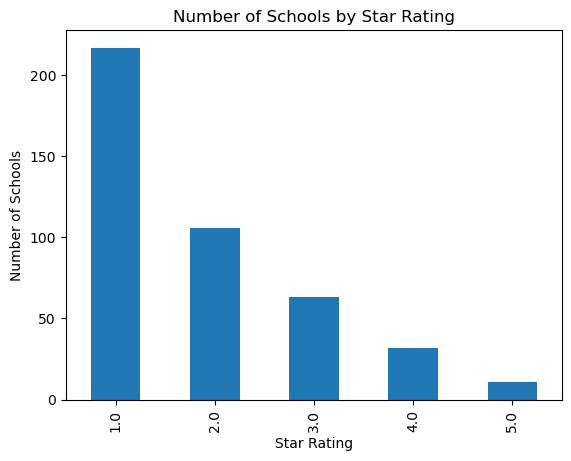

In [16]:
# In ra biểu đồ thể hiện số lượng trường học theo số sao
school_about['star_rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Star Rating')
plt.ylabel('Number of Schools')
plt.title('Number of Schools by Star Rating')
plt.show()

In [17]:
# Lưu dữ liệu vào file json
school_about.to_json('school_ranking.json', orient='records', lines=True, force_ascii=False)